In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from astropy.time import Time
import plotly.express as px
import plotly.graph_objects as go


In [2]:
test_df = pd.read_csv("aocs_and_dms_edac_cntr/2004_q2/ros_hk_nacw0d0a_2004_q2.tab",
                      names=["time", "edac_count"])

In [3]:
test_df

,time,edac_count
0,2004-04-01T00:03:26.974,769
1,2004-04-01T00:07:42.974,769
2,2004-04-01T00:11:58.974,769
3,2004-04-01T00:16:14.974,769
4,2004-04-01T00:20:30.975,769
...,...,...
25802,2004-06-30T23:17:57.978,18133
25803,2004-06-30T23:26:29.978,18133
25804,2004-06-30T23:35:01.978,18133
25805,2004-06-30T23:43:33.978,18133


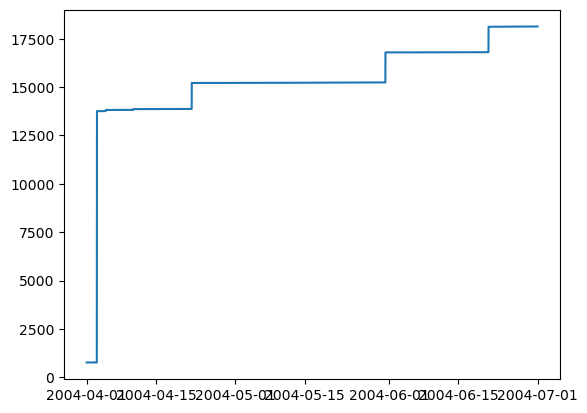

In [4]:
plt.plot(Time(test_df["time"].values.astype("U"),format='isot', scale='utc').to_datetime(),
         test_df["edac_count"].values)

In [5]:
def load_all_data():
    all_files = sorted(glob("aocs_and_dms_edac_cntr/*/ros_hk_nacw0d0a*.tab"))
    dfs = []
    for file in all_files:
        df = pd.read_csv(file, names=["time", "edac_count"])
        df["time"] = pd.to_datetime(df["time"].values.astype("U"))
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)


In [6]:
edac_df = load_all_data()

In [7]:
edac_df

,time,edac_count
0,2004-03-02 04:05:16.121,0
1,2004-03-02 04:05:32.121,0
2,2004-03-02 04:05:48.122,0
3,2004-03-02 04:06:06.118,0
4,2004-03-02 04:10:22.118,0
...,...,...
636886,2016-09-30 10:00:53.611,1073
636887,2016-09-30 10:09:25.612,1073
636888,2016-09-30 10:17:57.612,1073
636889,2016-09-30 10:26:29.612,1073


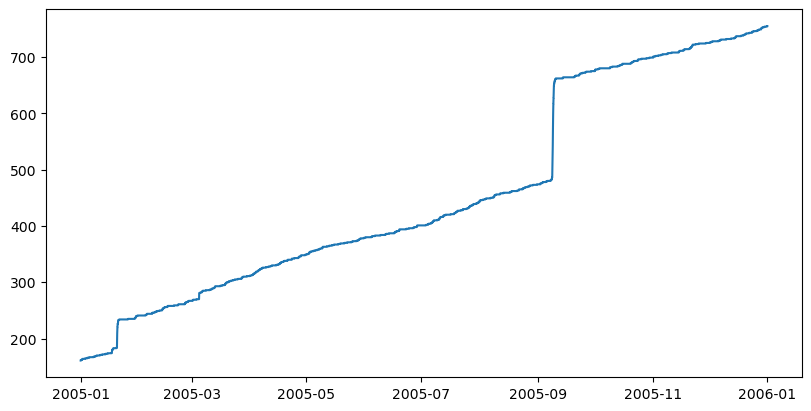

In [8]:
mask = (edac_df["time"] < pd.Timestamp("2006-01-01")) & (edac_df["time"] >= pd.Timestamp("2005-01-01"))
fig, ax = plt.subplots(figsize=(8,4), layout="constrained")
ax.plot(edac_df[mask]["time"].values,
         edac_df[mask]["edac_count"].values)


In [9]:
change_frame = (edac_df["edac_count"].values[1:] != edac_df["edac_count"].values[:-1])
key_frame = np.r_[True, change_frame] | np.r_[change_frame, True]

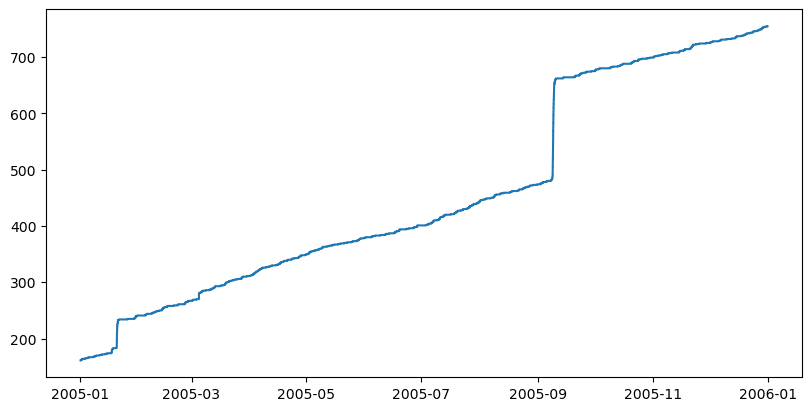

In [10]:
edac_df_key = edac_df[key_frame]
mask_key = ((edac_df_key["time"] < pd.Timestamp("2006-01-01")) & (edac_df_key["time"] >= pd.Timestamp("2005-01-01")))

fig, ax = plt.subplots(figsize=(8,4), layout="constrained")
ax.step(edac_df_key[mask_key]["time"].values,
         edac_df_key[mask_key]["edac_count"].values,
         where="mid")

Text(0.5, 1.0, 'Rosetta AOCS and DMS EDAC Counter')

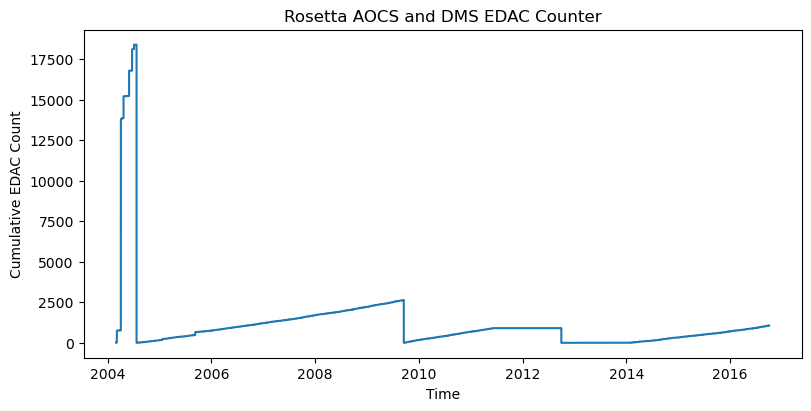

In [11]:
fig, ax = plt.subplots(figsize=(8,4), layout="constrained")
ax.step(edac_df_key["time"].values,
         edac_df_key["edac_count"].values,
         where="mid")
ax.set_xlabel("Time")
ax.set_ylabel("Cumulative EDAC Count")
ax.set_title("Rosetta AOCS and DMS EDAC Counter")

In [12]:
srem_test_df = pd.read_csv("./srem_2004_2006/SREM_L5_20040511.TAB")

In [13]:
def load_srem_data():
    srem_files = sorted(glob("./srem_2004_2006/SREM_L5*.TAB"))
    srem_dfs = []
    for file in srem_files:
        df = pd.read_csv(file)
        df.columns = df.columns.str.strip()
        df["TIME"] = pd.to_datetime(df["TIME"].values.astype("U"))
        srem_dfs.append(df)
    return pd.concat(srem_dfs, ignore_index=True)


In [14]:
srem_df = load_srem_data()

In [15]:
mask_pre_2006 = ((edac_df_key["time"] < pd.Timestamp("2006-01-01")) & (edac_df_key["time"] >= pd.Timestamp("2004-10-01")))
mask_srem = ((srem_df["TIME"] < pd.Timestamp("2006-01-01")) & (srem_df["TIME"] >= pd.Timestamp("2004-10-01")))

srem_df_pre_2006 = srem_df[mask_srem]
srem_select_columns = srem_df_pre_2006.columns[8:14]
srem_df_pre_2006["FPDO_Energy (>49 MeV)"] = srem_df_pre_2006[srem_select_columns].sum(axis=1)

/tmp/ipykernel_50622/1054789496.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srem_df_pre_2006["FPDO_Energy (>49 MeV)"] = srem_df_pre_2006[srem_select_columns].sum(axis=1)


In [16]:
fig_plotly = px.line(edac_df_key[mask_pre_2006], x="time", y="edac_count",
                     labels={"time": "Time", "edac_count": "Cumulative EDAC Count"},
                     title="Rosetta AOCS and DMS EDAC Counter")
fig_plotly.update_layout(width=1024, height=768)
fig_plotly.write_html("edac_counter_plot.html", include_plotlyjs="cdn")


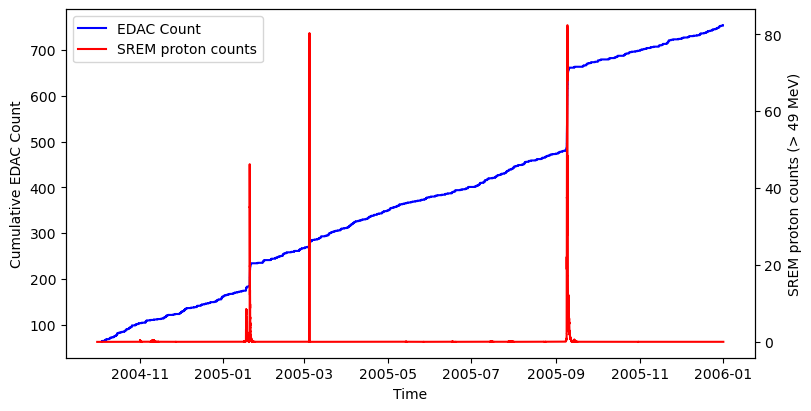

In [17]:
fig, ax = plt.subplots(figsize=(8,4), layout="constrained", sharex=True)

ax_srem = ax.twinx()

ln1, = ax.step(edac_df_key[mask_pre_2006]["time"].values, edac_df_key[mask_pre_2006]["edac_count"].values,
         where="mid", label="EDAC Count", color="blue")
ln2, = ax_srem.step(srem_df_pre_2006["TIME"].values, srem_df_pre_2006["FPDO_Energy (>49 MeV)"].values,
         where="mid", label="SREM proton counts", color="red")

ax.set_xlabel("Time")
ax.set_ylabel("Cumulative EDAC Count")
ax_srem.set_ylabel("SREM proton counts (> 49 MeV)")

ax.legend(handles=[ln1, ln2], loc="upper left")

In [18]:
fig_plotly_srem = go.Figure()

fig_plotly_srem.add_trace(go.Scatter(
    x=edac_df_key[mask_pre_2006]["time"],
    y=edac_df_key[mask_pre_2006]["edac_count"],
    mode="lines",
    name="EDAC Count",
    line=dict(color="blue", shape="hv")
))

fig_plotly_srem.add_trace(go.Scatter(
    x=srem_df_pre_2006["TIME"],
    y=srem_df_pre_2006["FPDO_Energy (>49 MeV)"],
    mode="lines",
    name="SREM proton counts",
    line=dict(color="red", shape="hv"),
    yaxis="y2"
))

fig_plotly_srem.update_layout(
    title="EDAC Count and SREM Proton Counts (>49 MeV)",
    xaxis=dict(title="Time"),
    yaxis=dict(title="Cumulative EDAC Count", color="blue"),
    yaxis2=dict(
        title="SREM proton counts (> 49 MeV)",
        overlaying="y",
        side="right",
        color="red"
    ),
    width=1024,
    height=768
)

fig_plotly_srem.write_html("edac_srem_plot.html", include_plotlyjs="cdn")